Tugas Mandiri Minggu ke-3 | Amaya Eshia - 0110224102 - ML Siang - AI_02

In [4]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# menghubungkan colab dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Praktikum Machine Learning_Amaya Eshia_0110224102_Ai02/Praktikum 3/Data/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Praktikum Machine Learning_Amaya Eshia_0110224102_Ai02/Praktikum 3/Data/day.csv', sep=',')

# Lihat 5 baris pertama
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [11]:
# Info dataset
print(df.info())
print("\n")
print(df.describe())

# Cek missing values
print("\nMissing values:")
print(df.isnull().sum())

# Lihat korelasi dengan cnt
print("\nKorelasi dengan cnt:")
print(df.select_dtypes(include=np.number).corr()['cnt'].sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


          instant      season          yr        mnth     holiday     weekday  \
count

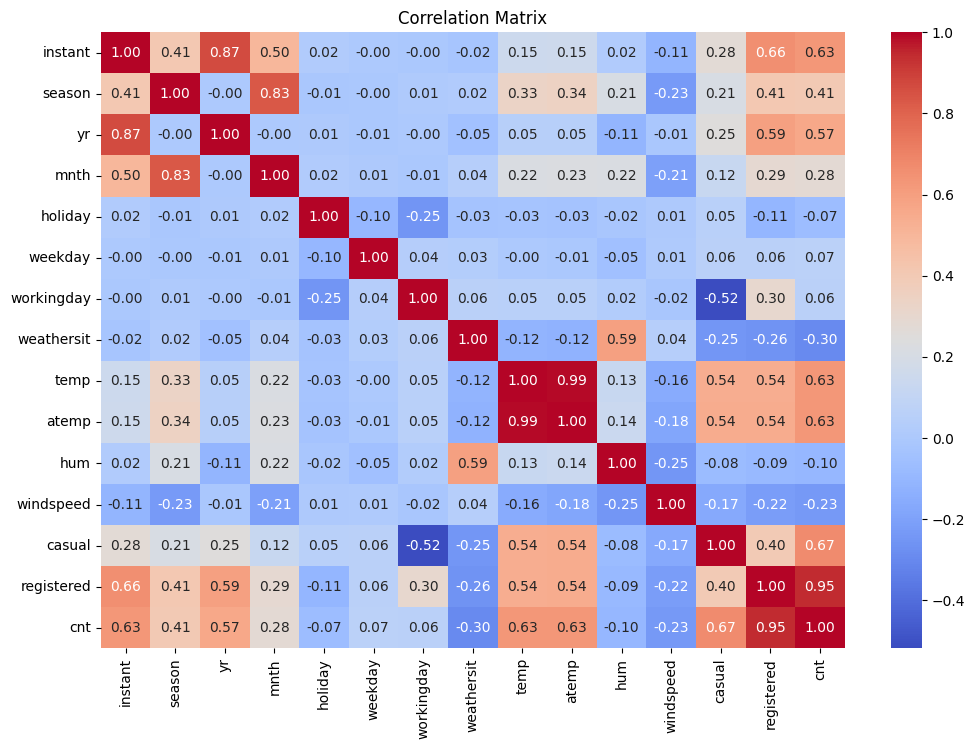

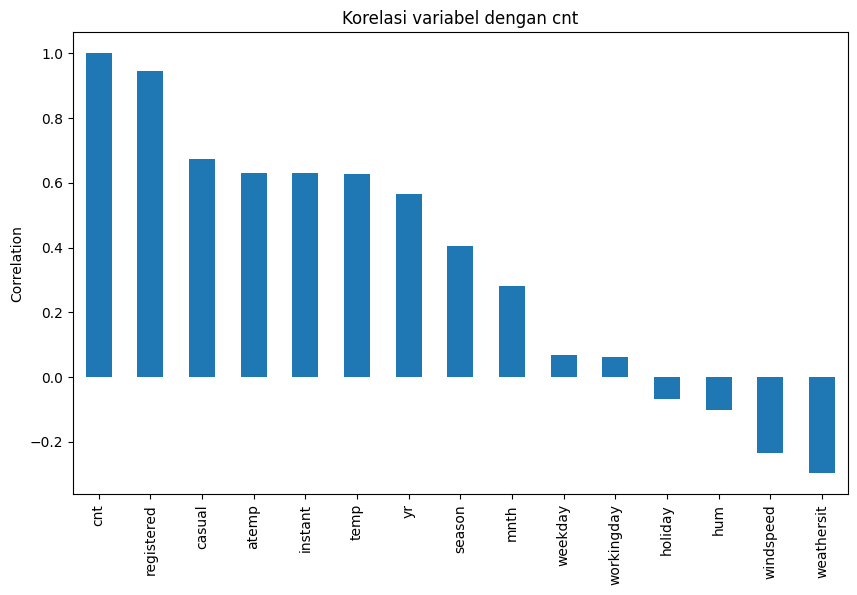

In [13]:
# Heatmap korelasi
plt.figure(figsize=(12, 8))
correlation_matrix = df.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Korelasi spesifik dengan cnt
plt.figure(figsize=(10, 6))
df.select_dtypes(include=np.number).corr()['cnt'].sort_values(ascending=False).plot(kind='bar')
plt.title('Korelasi variabel dengan cnt')
plt.ylabel('Correlation')
plt.show()

In [14]:
# Berdasarkan korelasi, pilih variabel yang paling berpengaruh
# Contoh: temp, atemp, hum, windspeed (sesuaikan dengan hasil analisis korelasi)

# Variabel independent (X) - pilih kolom yang relevan
X = df[['temp', 'atemp', 'hum', 'windspeed', 'season', 'yr', 'mnth',
        'holiday', 'weekday', 'workingday', 'weathersit']]

# Variabel dependent (Y)
y = df['cnt']

print("Shape X:", X.shape)
print("Shape y:", y.shape)

Shape X: (731, 11)
Shape y: (731,)


In [16]:
# Split data 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Jumlah data training:", len(X_train))
print("Jumlah data testing:", len(X_test))

Jumlah data training: 584
Jumlah data testing: 147


In [17]:
# Buat model
model = LinearRegression()

# Training model
model.fit(X_train, y_train)

# Koefisien
print("Koefisien:", model.coef_)
print("Intercept:", model.intercept_)

Koefisien: [ 2097.24783578  3488.04217936  -865.43941913 -2080.54039519
   524.72253637  2023.99754659   -38.44465798  -391.55076626
    72.93700256   160.80489213  -632.8562835 ]
Intercept: 1248.3209284778422


In [18]:
# Prediksi
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluasi
print("=== Evaluasi Model ===")
print(f"R² Score (train): {r2_score(y_train, y_pred_train):.4f}")
print(f"R² Score (test): {r2_score(y_test, y_pred_test):.4f}")
print(f"MAE (test): {mean_absolute_error(y_test, y_pred_test):.4f}")
print(f"MSE (test): {mean_squared_error(y_test, y_pred_test):.4f}")
print(f"RMSE (test): {np.sqrt(mean_squared_error(y_test, y_pred_test)):.4f}")

=== Evaluasi Model ===
R² Score (train): 0.7911
R² Score (test): 0.8277
MAE (test): 617.3931
MSE (test): 691035.0082
RMSE (test): 831.2852


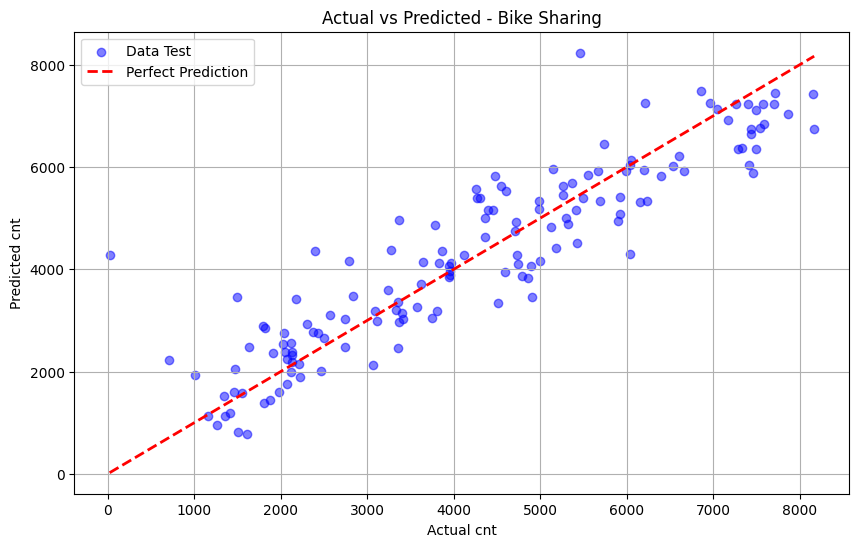

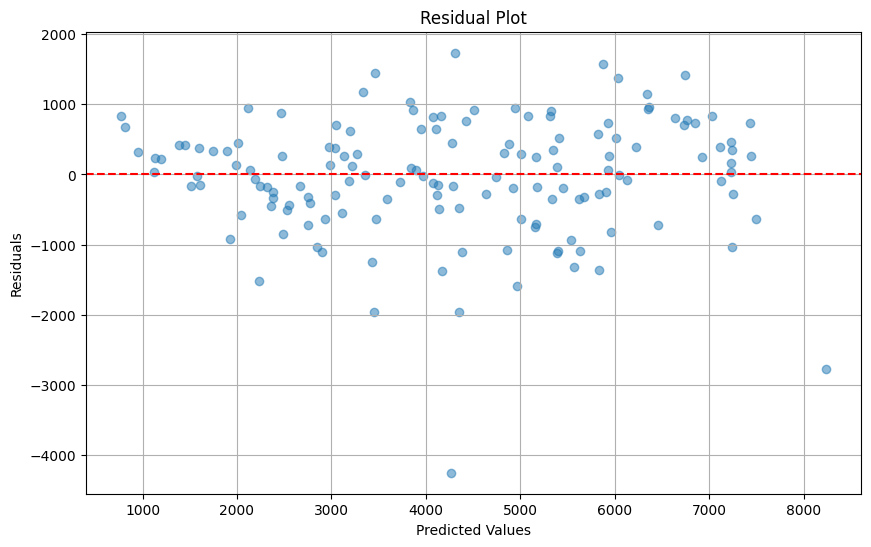

In [19]:
# Scatter plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5, color='blue', label='Data Test')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual cnt')
plt.ylabel('Predicted cnt')
plt.title('Actual vs Predicted - Bike Sharing')
plt.legend()
plt.grid(True)
plt.show()

# Residual plot
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

In [20]:
# Buat dataframe hasil
hasil = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred_test,
    'Error': y_test.values - y_pred_test
})

print(hasil.head(10))

# Statistik error
print("\n=== Statistik Error ===")
print(f"Mean Error: {hasil['Error'].mean():.4f}")
print(f"Std Error: {hasil['Error'].std():.4f}")

   Actual    Predicted        Error
0    6606  6220.416612   385.583388
1    1550  1571.605763   -21.605763
2    3747  3043.967028   703.032972
3    6041  4307.202484  1733.797516
4    7538  6765.659072   772.340928
5    7264  7231.536106    32.463894
6    1605   774.904147   830.095853
7    2209  2139.606601    69.393399
8    7499  7112.745605   386.254395
9    5743  6458.992169  -715.992169

=== Statistik Error ===
Mean Error: -23.8920
Std Error: 833.7826


Shape data: (731, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Korelasi dengan cnt:
cnt           1.000000
registered    0.94551

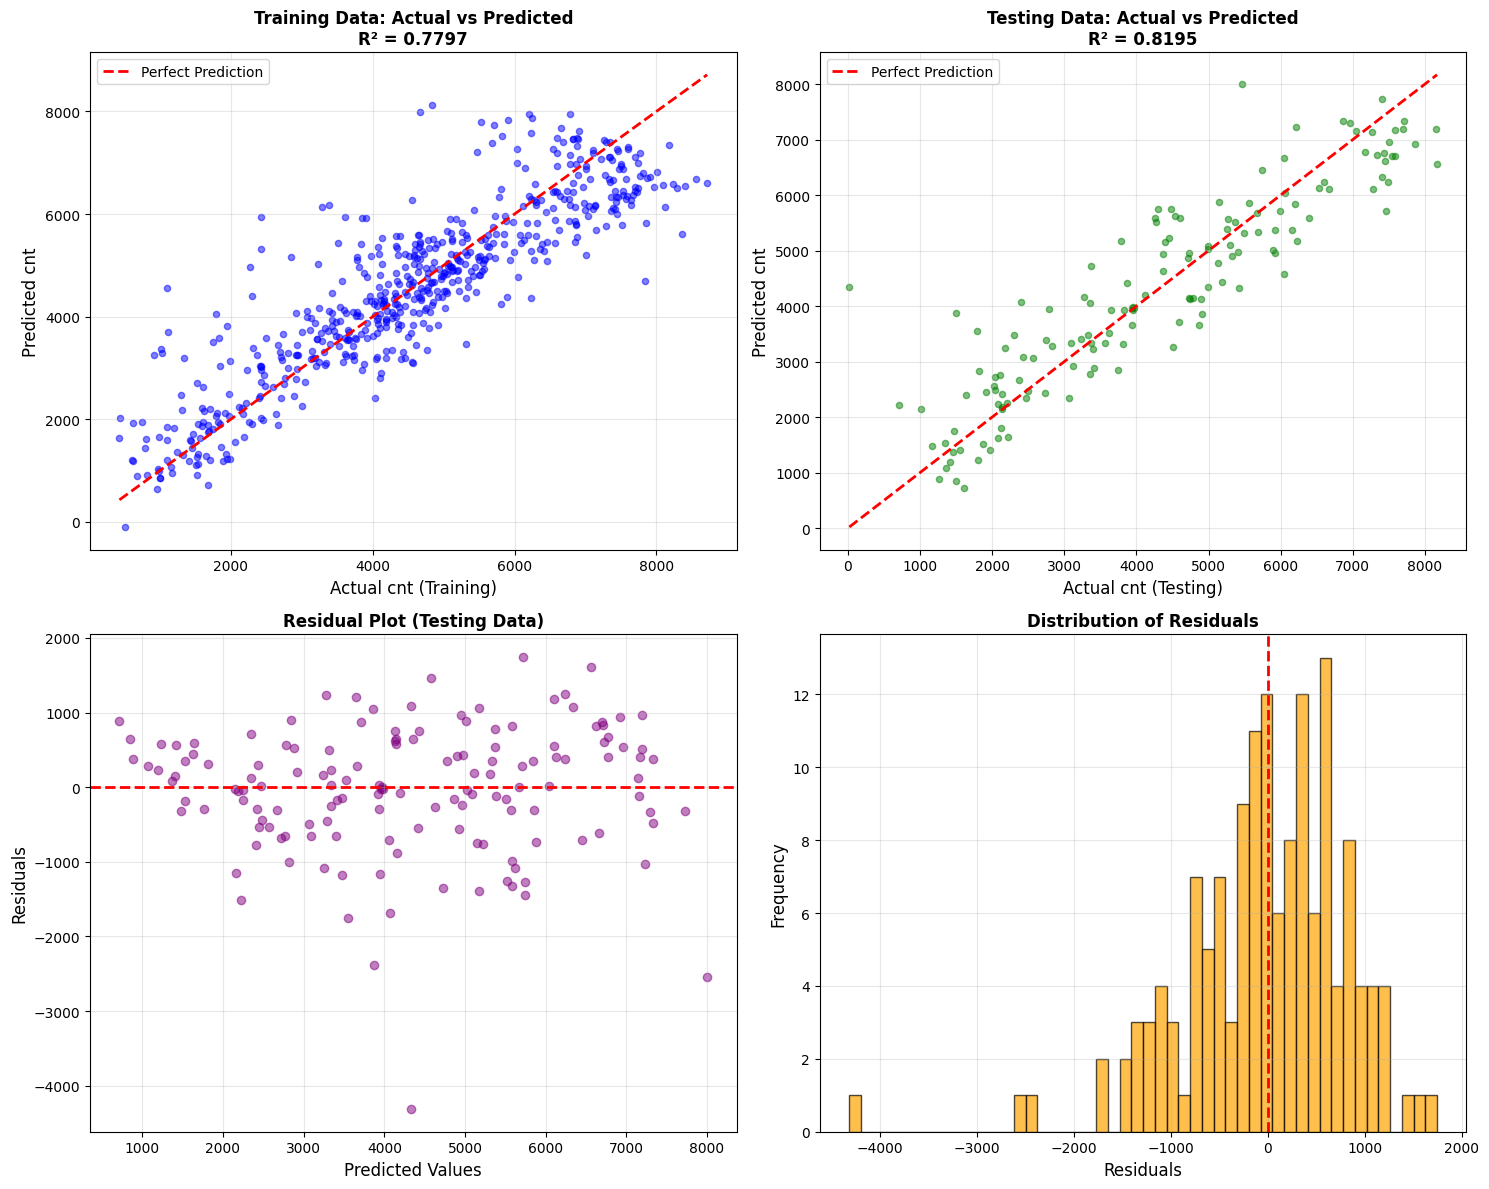

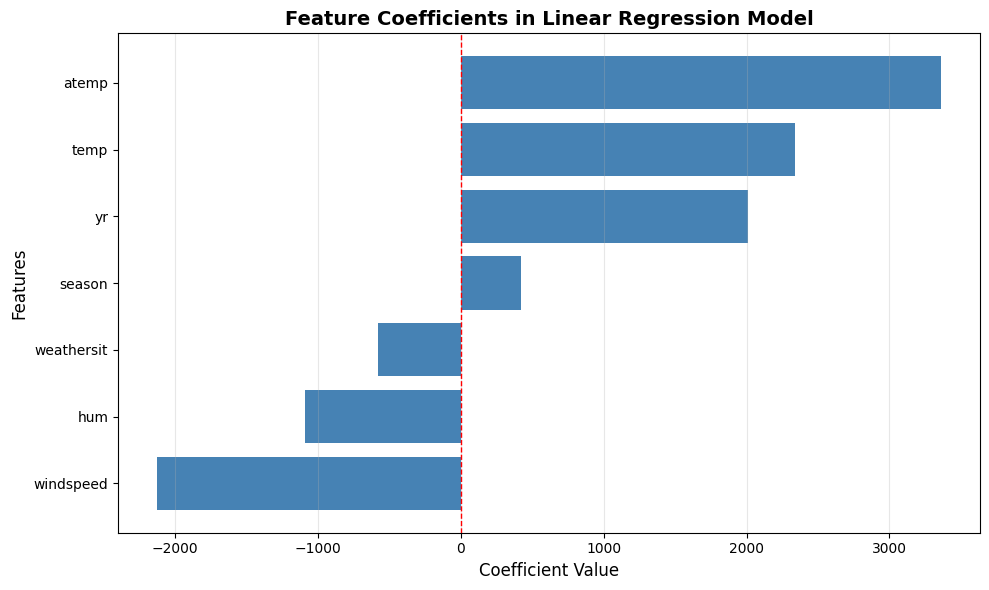


SAMPLE HASIL PREDIKSI (10 data pertama):
     Actual    Predicted        Error  Error_Pct
703    6606  6234.319004   371.680996   5.626415
33     1550  1406.041475   143.958525   9.287647
300    3747  2843.133134   903.866866  24.122414
456    6041  4582.604472  1458.395528  24.141624
633    7538  6706.484948   831.515052  11.030977
557    7264  7140.044010   123.955990   1.706443
39     1605   716.129617   888.870383  55.381332
356    2209  2248.276519   -39.276519  -1.778023
559    7499  6964.118190   534.881810   7.132708
514    5743  6445.732210  -702.732210 -12.236326

STATISTIK ERROR:
Mean Error: -24.9132
Std Error: 853.3201
Min Error: -4313.8737
Max Error: 1746.6601
Mean Absolute Error: 637.3621
Mean Error Percentage: -138.40%

INTERPRETASI MODEL:
1. Model mampu menjelaskan 81.95% variasi dalam data cnt
2. Rata-rata kesalahan prediksi (MAE): 637.36 unit cnt
3. Root Mean Squared Error (RMSE): 850.78 unit cnt
4. Variabel dengan pengaruh terbesar:
   - temp: 2335.7518
   - atemp: 

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 1. Load Data
df = pd.read_csv('/content/drive/MyDrive/Praktikum Machine Learning_Amaya Eshia_0110224102_Ai02/Praktikum 3/Data/day.csv', sep=',')

# 2. Pilih variabel (sesuaikan dengan kasus bike-sharing)
# Untuk dataset bike-sharing, kita bisa pakai temp, atemp, hum, windspeed, dll
# Contoh saya pakai beberapa variabel penting:

# Pastikan data sudah dibersihkan
print("Shape data:", df.shape)
print(df.info())

# 3. Cek korelasi dengan cnt terlebih dahulu
print("\nKorelasi dengan cnt:")
print(df.select_dtypes(include=np.number).corr()['cnt'].sort_values(ascending=False))

# 4. Pilih variabel independent dengan korelasi tinggi
# Misalnya: temp, atemp, hum, yr, season
X = df[['temp', 'atemp', 'hum', 'windspeed', 'yr', 'season', 'weathersit']]
y = df['cnt']

# 5. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nJumlah data training: {len(X_train)}")
print(f"Jumlah data testing: {len(X_test)}")

# 6. METODE 1: Menggunakan Statsmodels untuk hasil detail OLS
print("\n" + "="*80)
print("METODE 1: STATSMODELS OLS REGRESSION")
print("="*80)

# Tambahkan konstanta untuk statsmodels
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Fit model
model_sm = sm.OLS(y_train, X_train_sm)
results = model_sm.fit()

# Tampilkan hasil lengkap
print(results.summary())

# 7. METODE 2: Menggunakan Sklearn (lebih sederhana)
print("\n" + "="*80)
print("METODE 2: SKLEARN LINEAR REGRESSION")
print("="*80)

model_sk = LinearRegression()
model_sk.fit(X_train, y_train)

# Prediksi
y_pred_train = model_sk.predict(X_train)
y_pred_test = model_sk.predict(X_test)

# Evaluasi
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

print(f"\nR² Score (Training): {r2_train:.4f}")
print(f"R² Score (Testing): {r2_test:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

print("\nKoefisien Regresi:")
print(f"Intercept: {model_sk.intercept_:.4f}")
for i, col in enumerate(X.columns):
    print(f"  {col}: {model_sk.coef_[i]:.4f}")

# 8. VISUALISASI HASIL
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Actual vs Predicted (Training)
axes[0, 0].scatter(y_train, y_pred_train, alpha=0.5, color='blue', s=20)
axes[0, 0].plot([y_train.min(), y_train.max()],
                [y_train.min(), y_train.max()],
                'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual cnt (Training)', fontsize=12)
axes[0, 0].set_ylabel('Predicted cnt', fontsize=12)
axes[0, 0].set_title(f'Training Data: Actual vs Predicted\nR² = {r2_train:.4f}',
                     fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Actual vs Predicted (Testing)
axes[0, 1].scatter(y_test, y_pred_test, alpha=0.5, color='green', s=20)
axes[0, 1].plot([y_test.min(), y_test.max()],
                [y_test.min(), y_test.max()],
                'r--', lw=2, label='Perfect Prediction')
axes[0, 1].set_xlabel('Actual cnt (Testing)', fontsize=12)
axes[0, 1].set_ylabel('Predicted cnt', fontsize=12)
axes[0, 1].set_title(f'Testing Data: Actual vs Predicted\nR² = {r2_test:.4f}',
                     fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Residual Plot
residuals_test = y_test - y_pred_test
axes[1, 0].scatter(y_pred_test, residuals_test, alpha=0.5, color='purple')
axes[1, 0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 0].set_xlabel('Predicted Values', fontsize=12)
axes[1, 0].set_ylabel('Residuals', fontsize=12)
axes[1, 0].set_title('Residual Plot (Testing Data)', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Distribution of Residuals
axes[1, 1].hist(residuals_test, bins=50, color='orange', edgecolor='black', alpha=0.7)
axes[1, 1].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1, 1].set_xlabel('Residuals', fontsize=12)
axes[1, 1].set_ylabel('Frequency', fontsize=12)
axes[1, 1].set_title('Distribution of Residuals', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('regression_results.png', dpi=300, bbox_inches='tight')
plt.show()

# 9. VISUALISASI KOEFISIEN
plt.figure(figsize=(10, 6))
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model_sk.coef_
}).sort_values('Coefficient', ascending=True)

plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='steelblue')
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Coefficients in Linear Regression Model',
          fontsize=14, fontweight='bold')
plt.axvline(x=0, color='red', linestyle='--', linewidth=1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('coefficients.png', dpi=300, bbox_inches='tight')
plt.show()

# 10. TABEL HASIL PREDIKSI
hasil = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred_test,
    'Error': residuals_test,
    'Error_Pct': (residuals_test / y_test.values * 100)
})

print("\n" + "="*80)
print("SAMPLE HASIL PREDIKSI (10 data pertama):")
print("="*80)
print(hasil.head(10).to_string())

print("\n" + "="*80)
print("STATISTIK ERROR:")
print("="*80)
print(f"Mean Error: {hasil['Error'].mean():.4f}")
print(f"Std Error: {hasil['Error'].std():.4f}")
print(f"Min Error: {hasil['Error'].min():.4f}")
print(f"Max Error: {hasil['Error'].max():.4f}")
print(f"Mean Absolute Error: {hasil['Error'].abs().mean():.4f}")
print(f"Mean Error Percentage: {hasil['Error_Pct'].mean():.2f}%")

# 11. INTERPRETASI MODEL
print("\n" + "="*80)
print("INTERPRETASI MODEL:")
print("="*80)
print(f"1. Model mampu menjelaskan {r2_test*100:.2f}% variasi dalam data cnt")
print(f"2. Rata-rata kesalahan prediksi (MAE): {mae:.2f} unit cnt")
print(f"3. Root Mean Squared Error (RMSE): {rmse:.2f} unit cnt")
print(f"4. Variabel dengan pengaruh terbesar:")
for i, col in enumerate(X.columns):
    print(f"   - {col}: {model_sk.coef_[i]:.4f}")